In [1]:
import cv2 as cv
from matplotlib import pyplot as plt
import numpy as np

In [2]:
img = plt.imread(r'C:\Users\Viktor\Documents\IT\ReservoirRockAnalysis\data\Маячная\Mayach2_173872_2_2.jpg')

In [3]:
img.shape, img.dtype

((3120, 4164, 3), dtype('uint8'))

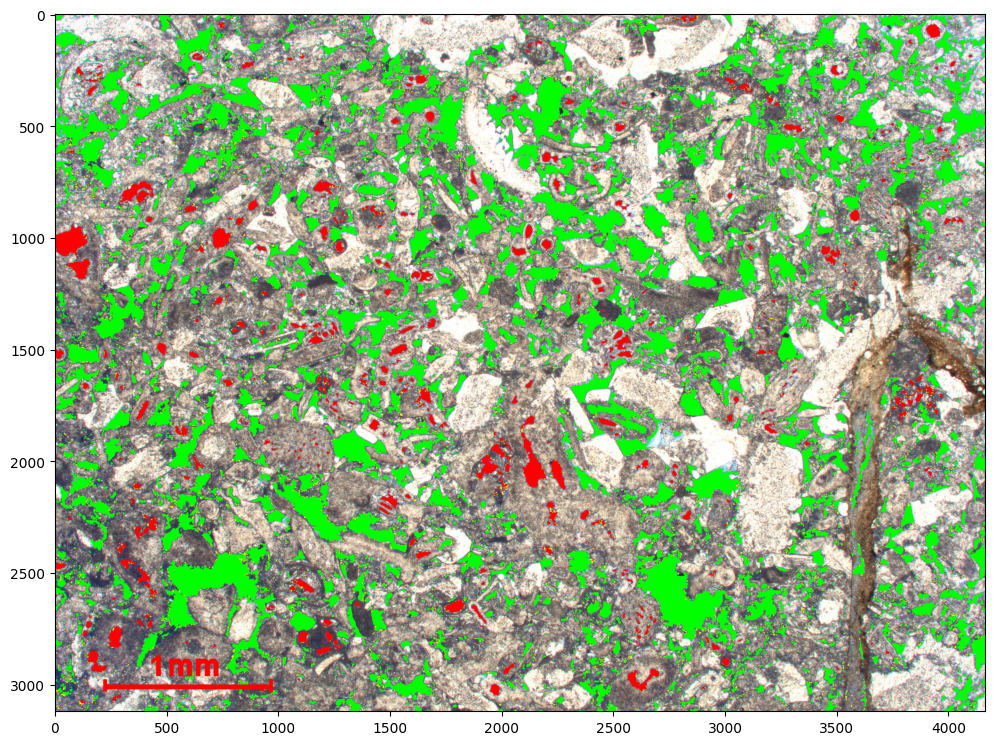

In [4]:
fig, ax = plt.subplots(figsize=(12, 17))
ax.imshow(img)

(array([1877887.,  342204.,  522210., 1269971., 2213839., 2120006.,
        1725751., 1167256.,  864567.,  887989.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

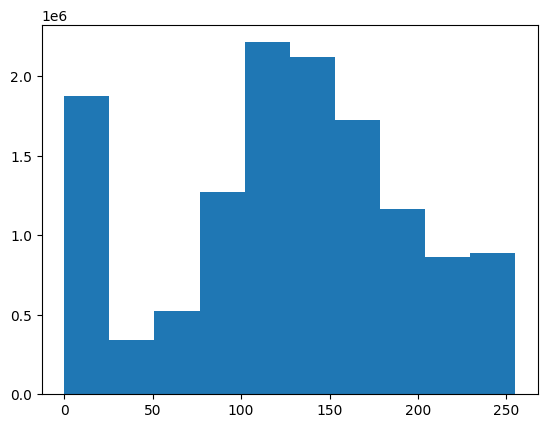

In [9]:
plt.hist(img[:, :, 2].reshape(-1))

In [379]:
hsv_img = cv.cvtColor(img, cv.COLOR_RGB2HSV)

In [435]:
# ret, mask = cv.threshold(cv.GaussianBlur(img[:, :, 0], (5,5), 0), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
# mask = cv.adaptiveThreshold(img[:, :, 0], 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2)
# ret, mask = cv.threshold(hsv_img[:, :, 1], 160, 255, cv.THRESH_BINARY)
ret, mask = cv.threshold(img[:, :, 0], 230, 255, cv.THRESH_BINARY)
mask.shape

(3120, 4164)

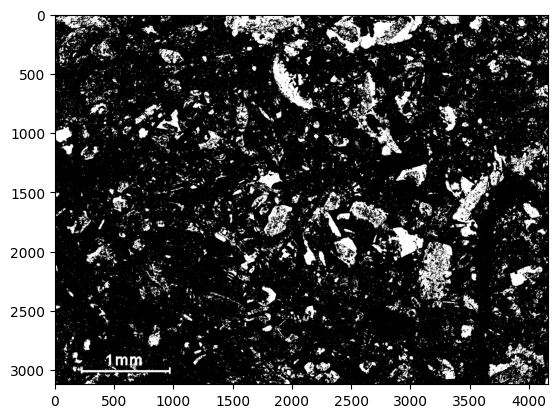

In [436]:
plt.imshow(mask, cmap='gray')

In [437]:
foreground =  img.copy() / 255 * np.stack([mask for _ in range(3)], axis=2) / 255

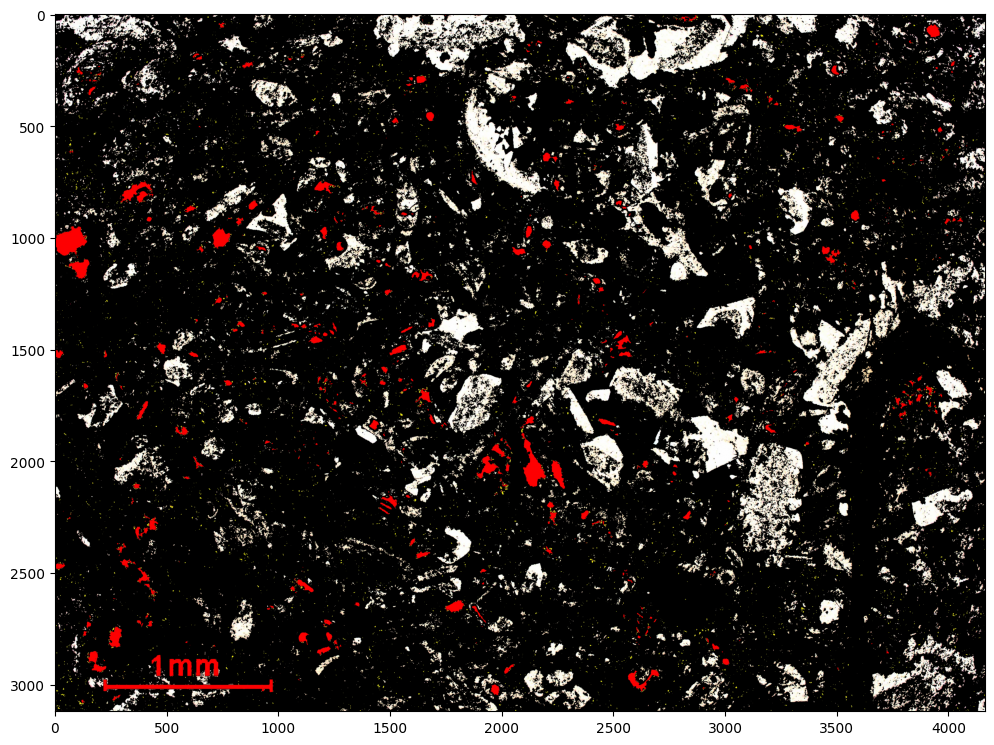

In [438]:
fig, ax = plt.subplots(figsize=(12, 17))
ax.imshow(foreground)

In [439]:
background =  img.copy() / 255 * np.stack([(1 - mask / 255) for _ in range(3)], axis=2) 

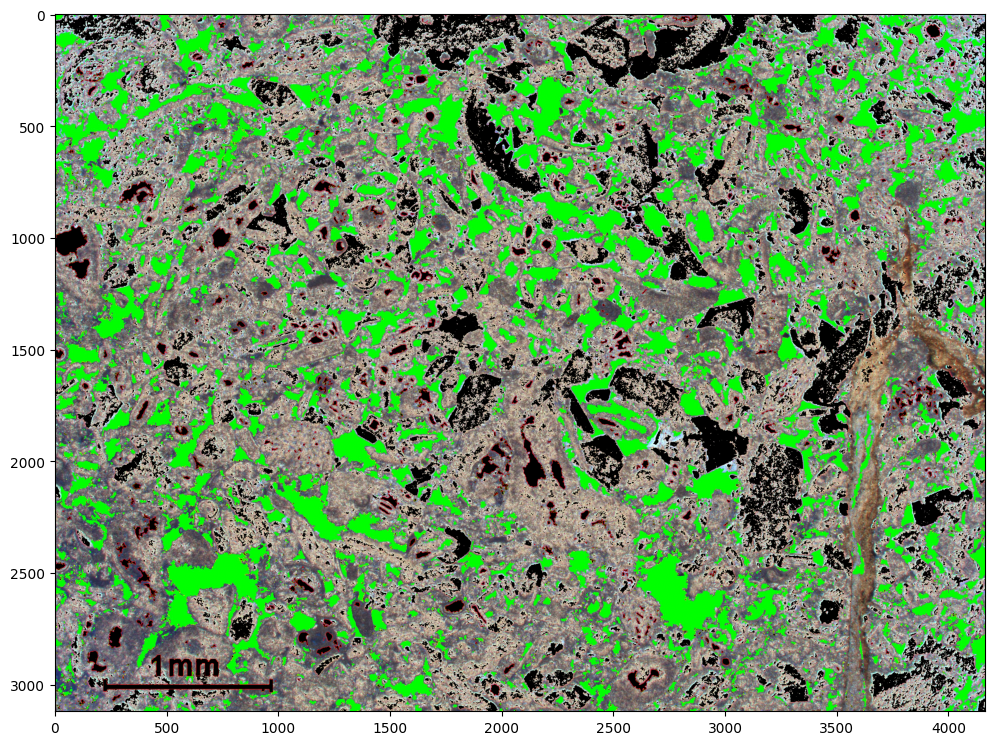

In [440]:
fig, ax = plt.subplots(figsize=(12, 17))
ax.imshow(background)

In [480]:
# noise removal
kernel = np.ones((2,2),np.uint8)
opening = cv.morphologyEx(mask ,cv.MORPH_OPEN,kernel, iterations = 1)
opening = mask.copy()
 
# sure background area
sure_bg = cv.dilate(opening,kernel,iterations=1)
 
# Finding sure foreground area
dist_transform = cv.distanceTransform(opening,cv.DIST_L2,5)
ret, sure_fg = cv.threshold(dist_transform,0.01*dist_transform.max(),255,0)
 
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv.subtract(sure_bg,sure_fg)

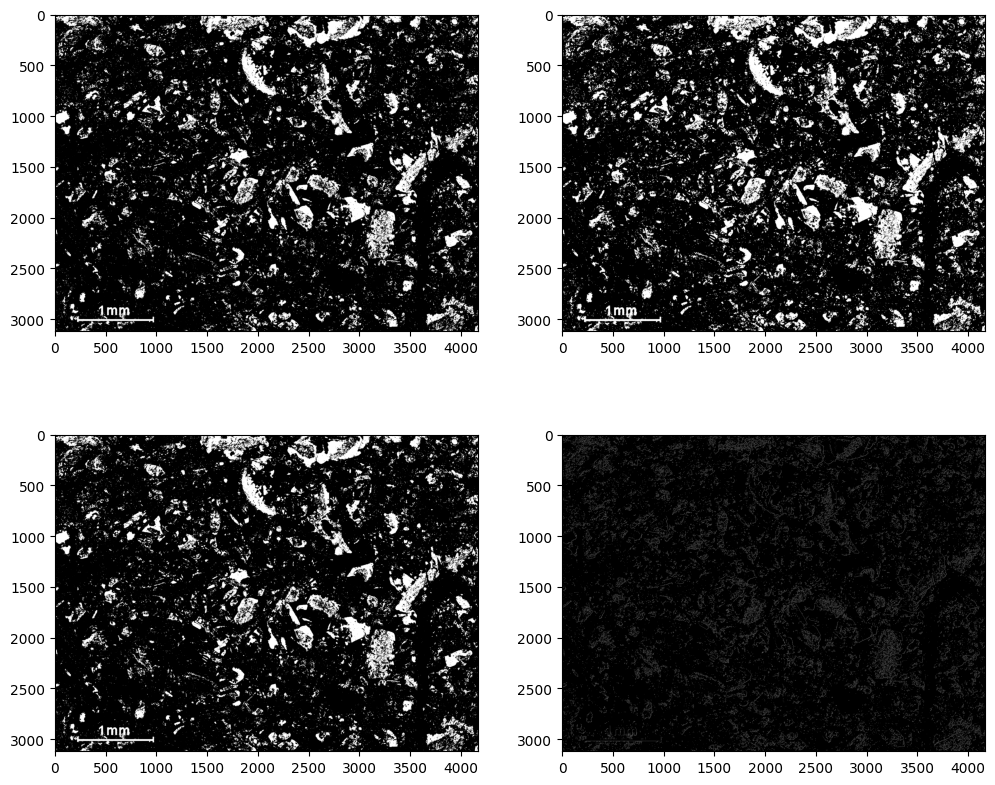

In [481]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].imshow(opening, cmap='gray')
axs[0, 1].imshow(sure_bg, cmap='gray')
axs[1, 0].imshow(sure_fg, cmap='gray')
axs[1, 1].imshow(unknown, cmap='gray')

In [482]:
# Marker labelling
ret, markers = cv.connectedComponents(sure_fg)
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
 
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

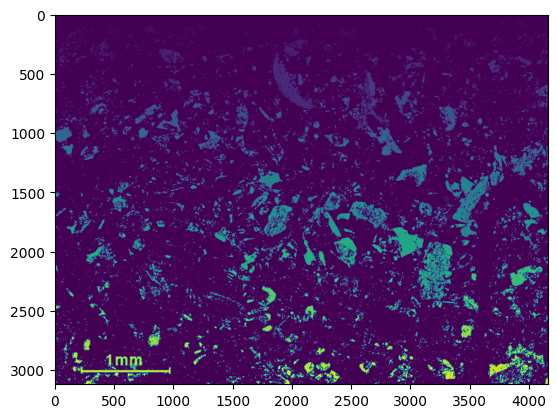

In [483]:
plt.imshow(markers)

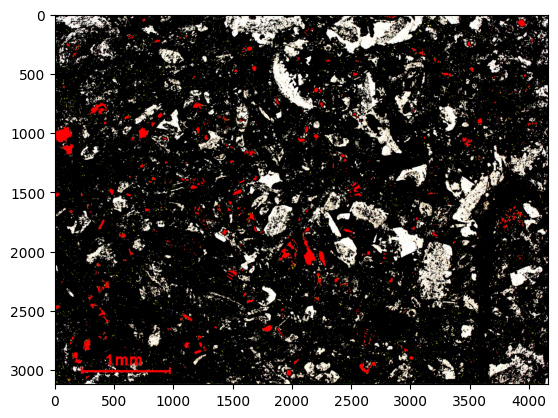

In [484]:
markers = cv.watershed(img,markers)
tmp = img.copy()
tmp[markers == 1] = [0,0,0]
plt.imshow(tmp)

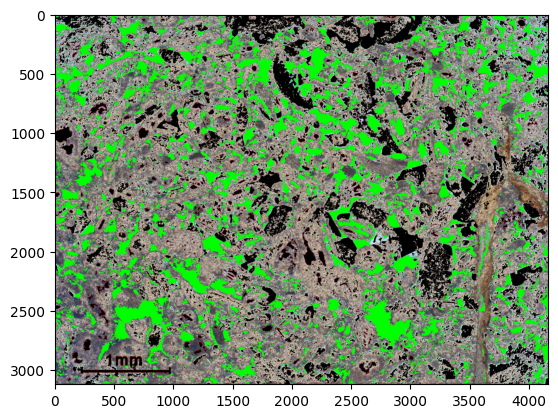

In [485]:
plt.imshow(img - tmp)